# The Breast cancer wisconsin (diagnostic)

## 1. Load the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sbn

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
display(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['label'] = data.target
df['label'] = df['label'].map({i :  data.target_names[i] for i in data.target})
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


The dataset contains 30 numerics features and one label with {'Malignant' , 'Benign'}

## 2. Generate a synthetic dataset

We will just keep 4 features, we will choose them by their correlations with target label.

In [ ]:
df['numeric label'] = data.target
correlation_matrix = df.corr()['numeric label']
sorted_correlation = correlation_matrix.abs().sort_values(ascending=False)
print(sorted_correlation)

numeric label              1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

<ipython-input-4-d7d52b27c161>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()['numeric label']


In [ ]:
feat_cor = sorted_correlation.index[1:5]
print('features to keep :\n {}'.format(feat_cor))

features to keep :
 Index(['worst concave points', 'worst perimeter', 'mean concave points',
       'worst radius'],
      dtype='object')


By plotting with different operations and different groups, I found that vals array bellow allows a good clustering with good distinction between each group

In [ ]:
df['X'] = df['worst concave points']*df['worst perimeter']
df['Y'] = df['mean concave points']*df['worst radius']
vals = np.array(df[['X', 'Y']].values.tolist())
labels = np.array(data.target)

In [ ]:
def plot_cluster(values, labels, labels_names):
    """ generate plot of clusters from values and labels,
    add also a legend with corresponding labels names
    """
    unique_labels = np.unique(labels)
    d = {i : labels_names [i] for i in labels}
    for label in unique_labels:
        cluster_points = values[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=d[label])

    plt.legend()
    plt.show()

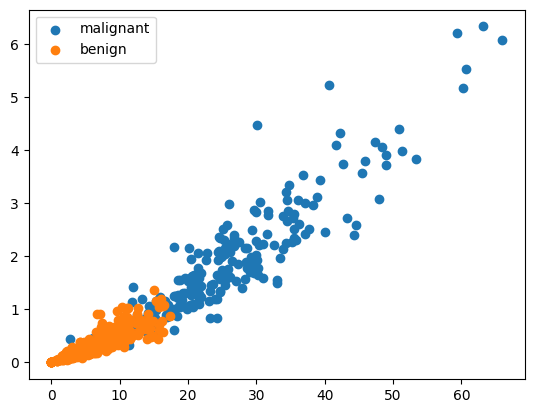

In [ ]:
#Plot the reals clusters
plot_cluster(vals, labels, data.target_names)

# Rand Index

In [ ]:
def rand_index(ref, est):
    """ return rand_index of est labels from the reals ones ref labels"""
    num = 0
    if len(ref) != len(est):
        print('arrays must be of the same size')
        error()
    for k in range(len(ref)):
        for l in range(len(ref)-k-1):
            if (ref[k]==ref[k+l+1] and est[k]==est[k+l+1]) or (ref[k]!=ref[k+l+1] and est[k]!=est[k+l+1]):
                num += 1
    den = len(ref)*(len(ref)-1)/2
    return num/den

In [ ]:
#first test for the true labels
ri = rand_index(labels, labels)
print(ri)

1.0


In [ ]:
def analysis_rand_index(n_sample, method, values, labels, k, link=None, eps=None):
  """ generate n_sample clusters for method of clustering input for values and labels,
  catch each rand index and display the distribution, the mean and max value.
  link is if you use linkage method
  eps is if you use dbscan method
  """
  print('Analysis of {} uses of {} method with {}-cluster'.format(n_sample, method.__name__, k))
  ri = np.zeros((n_sample))
  for i in range(n_sample):
    if link:
      ri[i] = rand_index(labels, method(values, k, link))
    elif eps:
      ri[i] = rand_index(labels, method(values, k, eps))
    else:
      ri[i] = rand_index(labels, method(values, k))
  print('Mean of rank index :', ri.mean())
  print('Max of rand index :', ri.max())
  print('Distribution :')
  plt.bar(0, np.mean(ri), yerr = np.std(ri), alpha=0.5, ecolor='black', capsize=10)
  plt.show()

In [ ]:
N_SAMPLE = 100

# Random Clustering

In [ ]:
def random_cluster(vals, k):
   return np.random.randint(0, k, vals.shape[0])

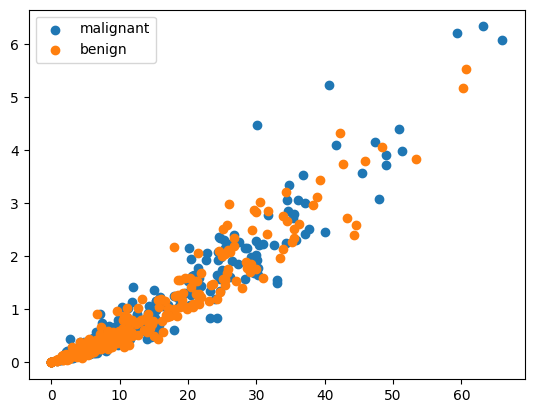

In [ ]:
lk = len(np.unique(labels))
random_labels = random_cluster(vals,lk)
plot_cluster(vals, random_labels, data.target_names)

Analysis of 100 uses of random_cluster method with 2-cluster
Mean of rank index : 0.49980853486472454
Max of rand index : 0.5037995989999753
Distribution :


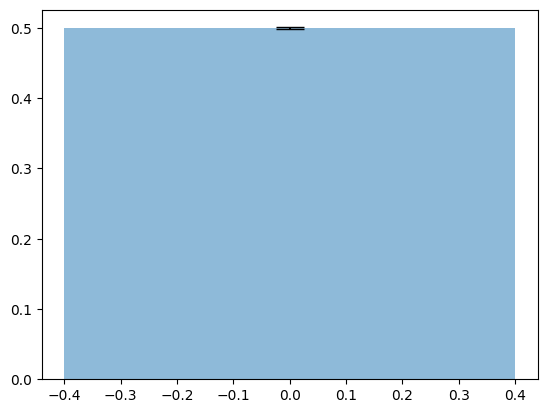

In [ ]:
analysis_rand_index(N_SAMPLE, random_cluster,vals, labels, lk)

For our future clustering method we need to get a rand index greater than 0.50, if it will not be the case our clustering method will no be pertinent.

# Hierarchical Clustering

## Eucledian distance matrix

In [ ]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform

In [ ]:
euc_distance_matrix = pdist(vals)

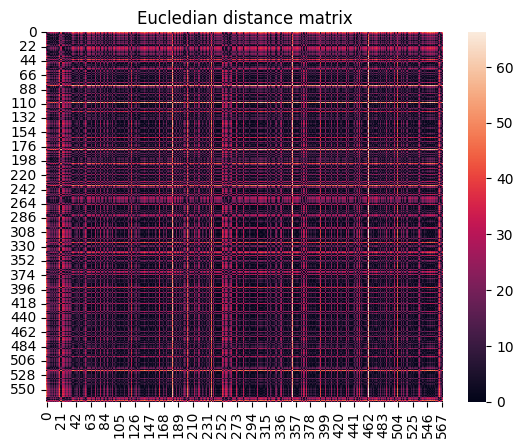

In [ ]:
#We compute the squareform with scipy.spatial.distance.squareform
#and plot a heatmap through seaborn
squareform = squareform(euc_distance_matrix)
plt.title("Eucledian distance matrix")
sbn.heatmap(squareform)
plt.show()

## Dendrogram

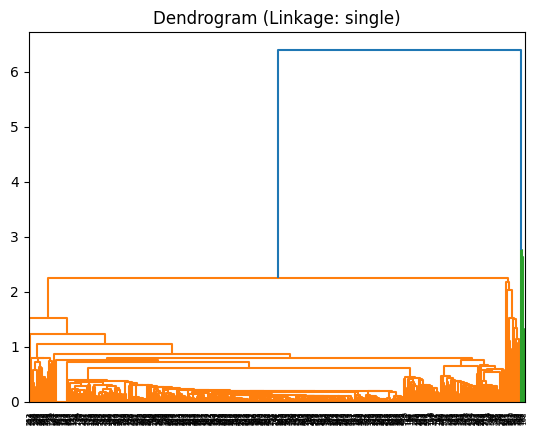

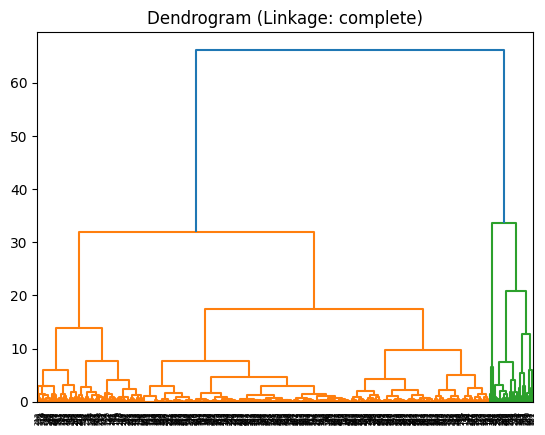

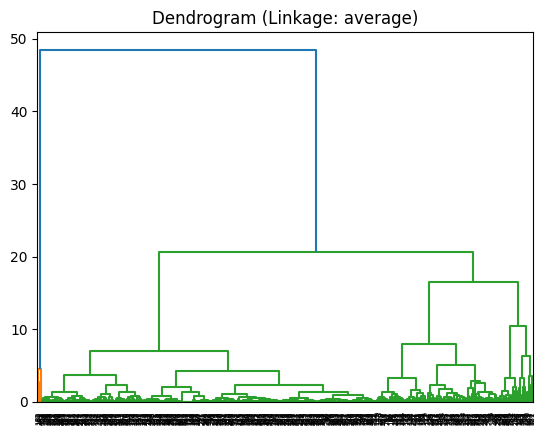

In [ ]:
def plot_dendrogram(Z, title):
  plt.figure()
  dn = dendrogram(Z)
  plt.title(title)
  plt.show()

linkages = ["single", "complete", "average"]
for link in linkages:
    Z = linkage(euc_distance_matrix, method=link)
    plot_dendrogram(Z, title=f'Dendrogram (Linkage: {link})')

## Agglomerative Clustering

In [ ]:
def agglomerative_cluster(x, k, method="single"):
  d = pdist(x)
  l = linkage(d, method)
  cluster = fcluster(l, k, criterion='maxclust')
  return cluster - 1

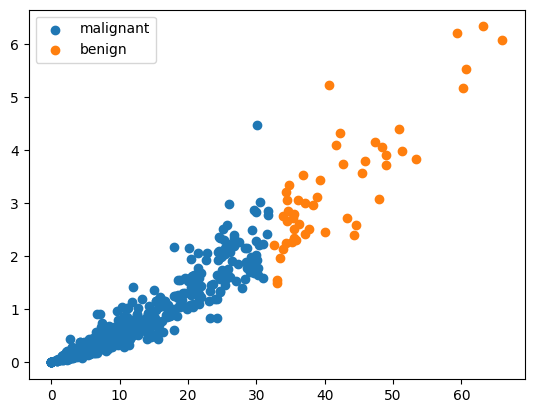

In [ ]:
agg_labels = agglomerative_cluster(vals, lk, "complete")
plot_cluster(vals, agg_labels, data.target_names)

Analysis of 100 uses of agglomerative_cluster method with 2-cluster
Mean of rank index : 0.591982474813733
Max of rand index : 0.591982474813733
Distribution :


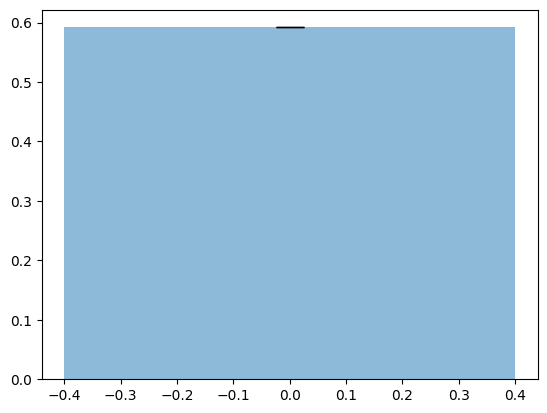

In [ ]:
analysis_rand_index(N_SAMPLE, agglomerative_cluster,vals, labels, lk, "complete")

We can see that agglomerative clustering is stable at rand index =  0.59 with complete linkage method. It is better than random clustering method but it stills not very efficient.

# Partitional Clustering - Kmeans

In [ ]:
!pip install scikit-learn-extra

In [ ]:
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

## KMeans

In [ ]:
def kmeans_cluster(vals, k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(vals)
    return kmeans.labels_

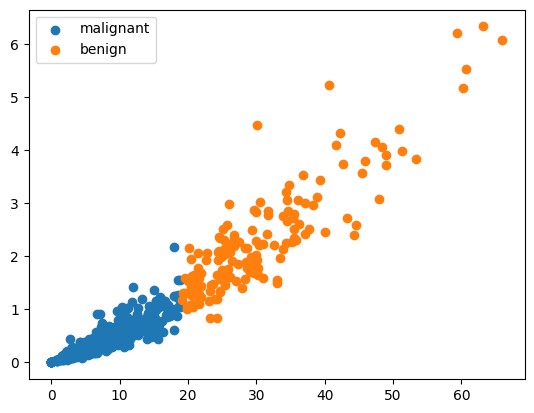

In [ ]:
kmeans_labels = kmeans_cluster(vals, lk)
plot_cluster(vals,kmeans_labels, data.target_names)

Analysis of 100 uses of kmeans_cluster method with 2-cluster
Mean of rank index : 0.8307631377014282
Max of rand index : 0.8307631377014283
Distribution :


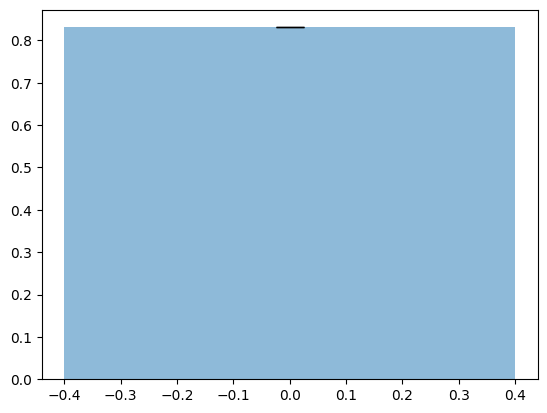

In [ ]:
analysis_rand_index(N_SAMPLE, kmeans_cluster,vals, labels, lk)

We can see that kmeans clustering is stable at rand index =  0.83 which is much better than random clustering.

## KMedoids

In [ ]:
def kmedoids_cluster(vals, k):
    kmedoids = KMedoids(n_clusters=k, random_state=0).fit(vals)
    return kmedoids.labels_

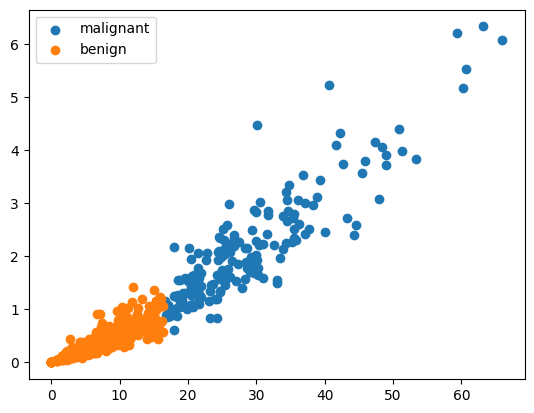

In [ ]:
kmedoids_labels = kmedoids_cluster(vals, lk)
plot_cluster(vals, kmedoids_labels, data.target_names)

Analysis of 100 uses of kmedoids_cluster method with 2-cluster
Mean of rank index : 0.8874353325577369
Max of rand index : 0.8874353325577365
Distribution :


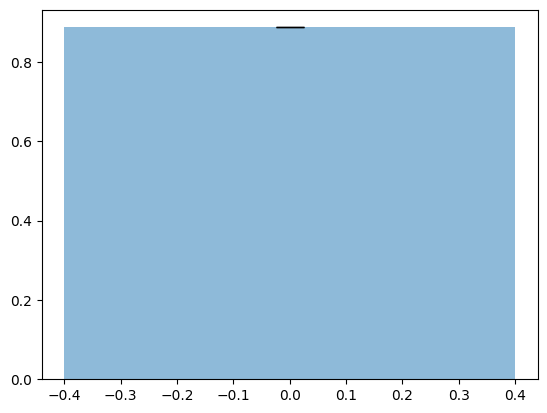

In [ ]:
analysis_rand_index(N_SAMPLE, kmedoids_cluster,vals, labels, lk)

We can see that kmedoids clustering is stable at rand index = 0.887 which is much better than random clustering. Moreover it perfomed better than kmeans.

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
def DBSCAN_cluster(vals, k, eps=0.5):
  clustering_DBSCAN = DBSCAN(eps=eps, min_samples=k).fit(vals)
  return clustering_DBSCAN.labels_

In [ ]:
DBSCAN_labels = DBSCAN_cluster(vals,lk, 0.01)
DBSCAN_labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [ ]:
print('DBSCAN clustering generate {} clusters'.format(len(np.unique(DBSCAN_labels))))

DBSCAN clustering generate 4 clusters


In [ ]:
def DBSCAN_cluster_size(vals, k):
  """ try different clustering with dbscan and with different eps values
  and return all eps values which allow to create k cluster
  """
  eps_array = np.arange(0.1, 1, 0.0005)
  eps_works = []
  for eps in eps_array:
    DBSCAN_labels = DBSCAN_cluster(vals,k, eps)
    if len(np.unique(DBSCAN_labels)) == k:
      eps_works.append(eps)
  return eps_works

In [ ]:
eps_works = DBSCAN_cluster_size(vals, lk)
if eps_works:
  print('there are at least {} eps values which works'.format(len(eps_works)))
else:
  print('DBSCAN clustering did not manage to create {} clusters'.format(lk))

DBSCAN clustering did not manage to create 2 clusters


Now we try to catch the best eps value, if they exist

In [ ]:
if eps_works:
  ri = np.zeros((len(eps_works)))
  for i, eps in enumerate(eps_works):
    ri[i] = rand_index(labels, DBSCAN_cluster(vals,lk, eps))
  print('Mean of rank index :', ri.mean())
  print('Max of rand index :', ri.max())
  index = np.where(ri == ri.max())[0][0]
  best_eps = eps_works[index]
  print('Best eps value :', best_eps)
else:
  best_eps = 0.5

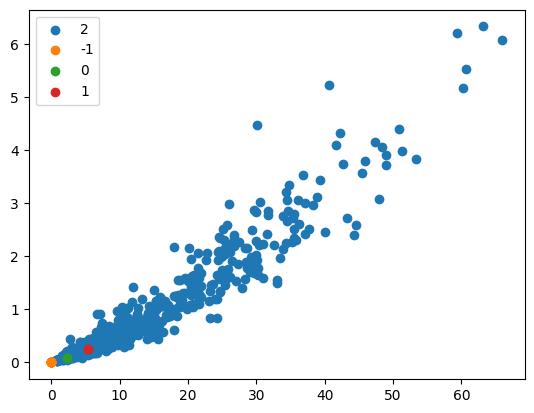

In [ ]:
if eps_works:
  DBSCAN_labels = DBSCAN_cluster(vals,lk,best_eps)
  plot_cluster(vals, DBSCAN_labels, data.target_names)
else:
  plot_cluster(vals, DBSCAN_labels,[str(i) for i in np.unique(DBSCAN_labels)])

Analysis of 100 uses of DBSCAN_cluster method with 2-cluster
Mean of rank index : 0.7673766677393006
Max of rand index : 0.7673766677393005
Distribution :


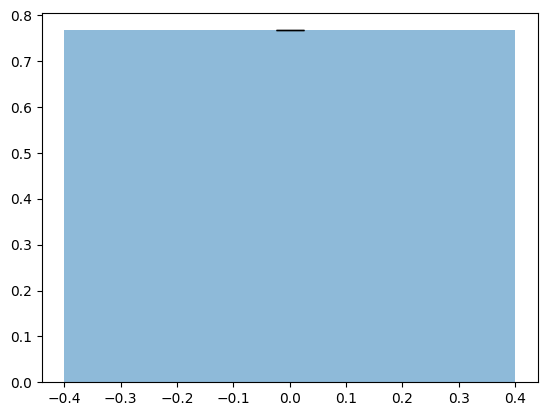

In [ ]:
if eps_works:
  analysis_rand_index(N_SAMPLE, DBSCAN_cluster,vals, labels, lk, eps=best_eps)
else:
  analysis_rand_index(N_SAMPLE, DBSCAN_cluster,vals, labels, lk)

We can see that DBSCAN clustering is stable at rand index = 0.626 which is  better than random clustering but not very efficient, and it created more clusters than we want.

# Performance Analysis

In [ ]:
def performance_analysis(n_sample,values, labels, k,method='single', eps=0.5):
  ri = np.zeros((5, n_sample))
  for i in range(n_sample):
      ri[0, i] = rand_index(labels, random_cluster(values, k))
      ri[1, i] = rand_index(labels, agglomerative_cluster(values, k, method))
      ri[2, i] = rand_index(labels, kmeans_cluster(values, k))
      ri[3, i] = rand_index(labels, kmedoids_cluster(values, k))
      ri[4, i] = rand_index(labels, DBSCAN_cluster(values,k,eps))

  x = [0, 1, 2, 3, 4]
  method_labels = ['Random', 'Hierarchical', 'kmeans', 'kmedoids', 'DBSCAN']
  plt.bar(x, np.mean(ri, axis=1), yerr = np.std(ri, axis=1), alpha=0.5, ecolor='black')
  plt.ylabel('rand index')
  plt.xticks(x, method_labels)

  mean = ri.mean()
  max = ri.max()
  max_method_index = np.unique(np.where(ri == max)[0])
  best_methods = ''
  for k, i in enumerate(max_method_index):
     best_methods += str(k+1) + '. ' + method_labels[i] + ' '
  print('Mean of rank index :', ri.mean())
  print('Max of rand index :', ri.max())
  print('Methods with best rand index :\n' + best_methods)
  print('Distribution :')
  plt.show()
  return ri

Mean of rank index : 0.7044006039753458
Max of rand index : 0.8874353325577365
Methods with best rand index :
1. kmedoids 
Distribution :


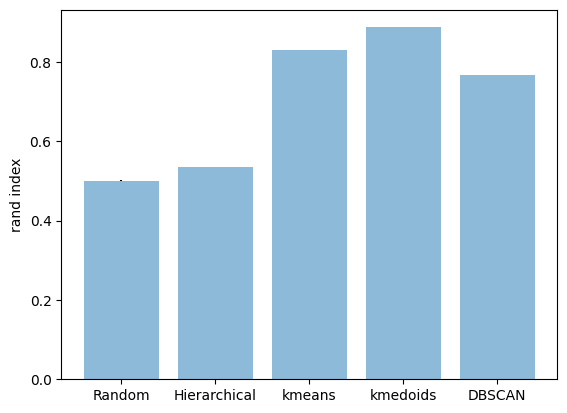

In [ ]:
ri = performance_analysis(N_SAMPLE, vals, labels, lk, 'average', best_eps)